In [2]:
#Importando as bibliotecas úteis ao projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import scipy as sp
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.metrics import silhouette_score
from sklearn.metrics import DistanceMetric

In [3]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

A fim de dar prosseguimento ao que foi feito no trabalho da última disciplina, a base de dados utilizada será a mesma da disciplina passada.


A Base de dados selecionada contempla diversos indicadores de diversos países, onde é possível estabelecer relações entre indicadores presentes no país que influenciam diretamente outros. Essa influência pode ocorrer tanto de maneira diretamente quanto de maneira inversamente proporcional.

Nessa base de dados os países tem indicadores, tais como:
- Mortalidade Infantil
- Renda
- Expectativa de vida
- Exportação
- Importação 
e etc.

Cada um desses valores atesta onde um país se encontra, havendo variáveis - conforme veremos a seguir - que impactam diretamente o valor de outras.

# Importando a base de dados

In [5]:
countries = pd.read_csv('Country-data.csv', sep=',')
countries.set_index('country', inplace=True)

# Análise gráfica das variáveis do dataframe

- Matrix de dispersao para verificar a correlação entre as variáveis

Text(0.5, 0.98, 'Matriz de dispersão')

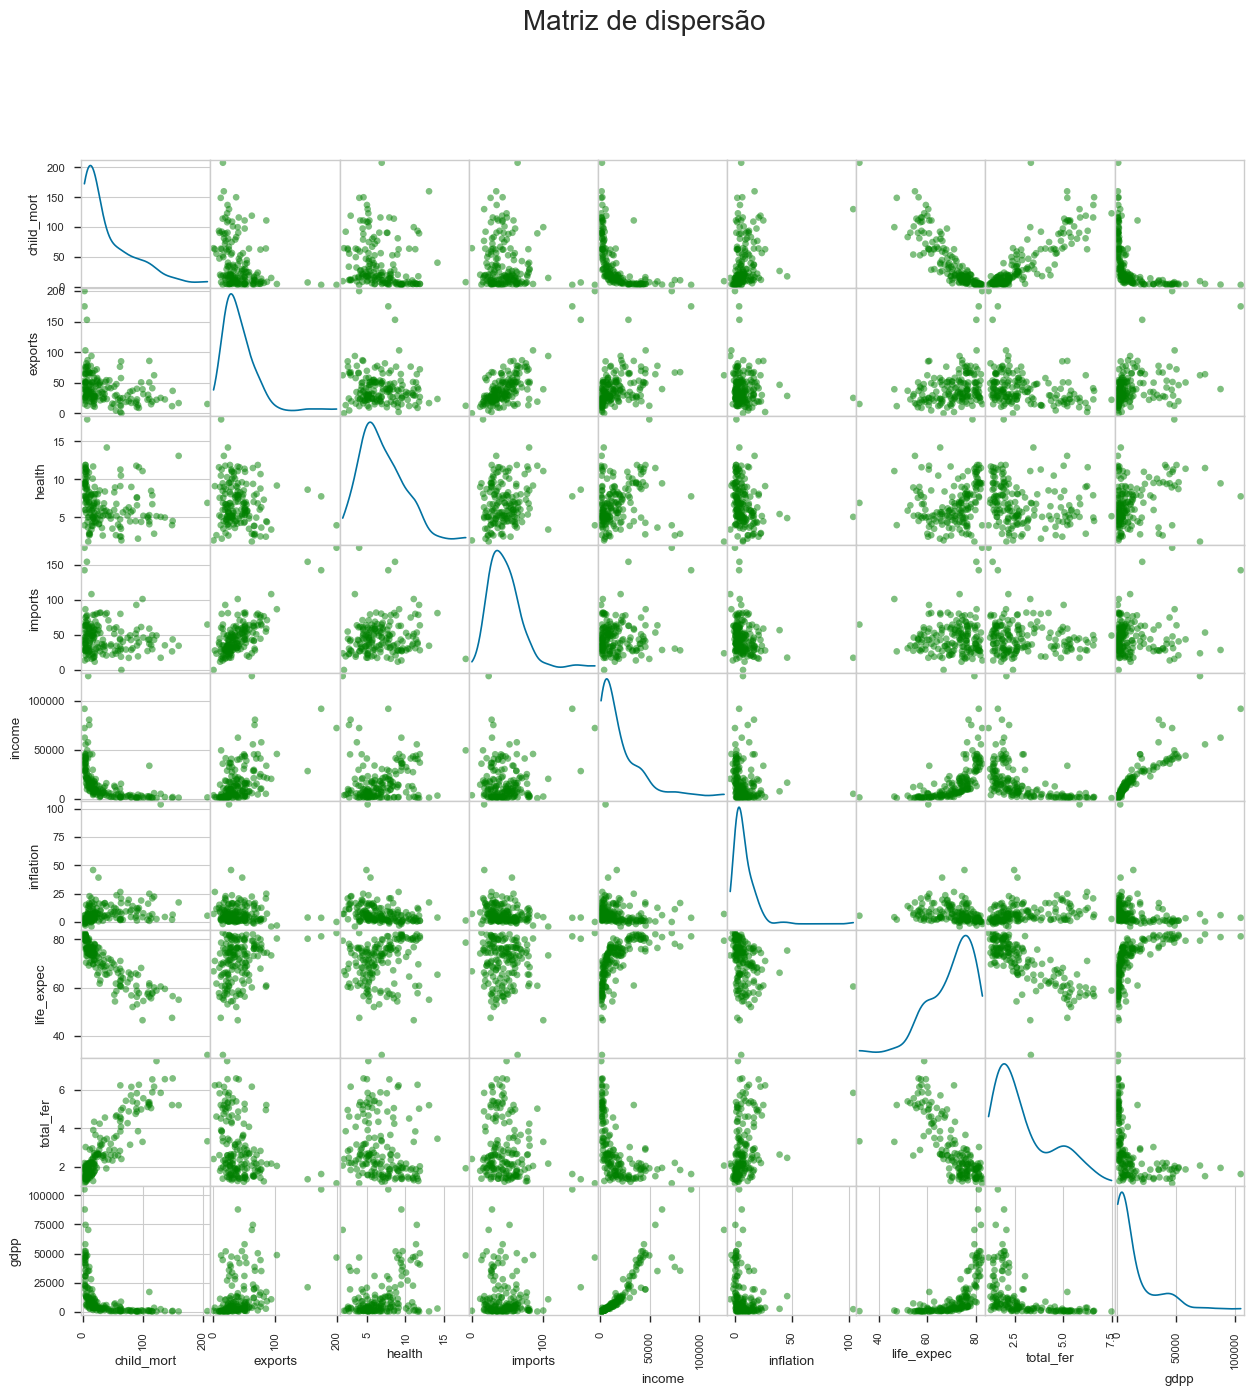

In [22]:
pd.plotting.scatter_matrix(countries, diagonal='kde', figsize=(15,15), marker='o', grid=True, color='green');
plt.suptitle('Matriz de dispersão', fontsize=20)

Uma breve visualização na Matrix de dispersao nos permite afirmar:

- As variaveis life_expec (expectativa de vida) e child_mort (Mortalidade infantil) sao praticamente inversamente proporcionais.
- Os auferidores da balança comercial de um país (Importação e exportação) também apresentam um bom grau de correlação, mostrando uma coerência dessa amostra no que diz respeito aos países que mais compram serem os que mais vendem.
- A saúde nao apresenta um alto grau de correlação com nenhuma variável, porém mostra uma correlação boa com o PIB per capita (gdpp), o que faz total sentido, pois em países com um maior pib per capita há uma tendencia ao acesso a uma saúde melhor.
- Em paralelo ao ponto de cima, a expectativa de vida também aumenta quando o PIB per capita aumenta.

# Realizando pré processamento

- O pré-processamento dos dados é uma etapa importante para a análise de dados, pois é nela que os dados são tratados e preparados para a análise.
- Aqui, os dados são normalizados para que os dados não sejam distorcidos por valores muito altos ou muito baixos.

Passos para o pré processamento:

1. Selecione uma base de dados em formato e a transforme em um dataframe
2. Importe a função Standard Scaler da biblioteca sklearn.preprocessing
3. Instancie o StandardScaler como uma variável qualquer.
4. Aplique ao dataframe que se deseja instanciar o pre-processamento.
5. Para facilitar a visualização dos dados normalizados, atribua essa base normalizada uma nova variável em formato de Dataframe.

In [6]:
#Normalizando os dados e criando um novo dataframe com os dados normalizados
scaler = StandardScaler()
countries_scaled = pd.DataFrame(
                                scaler.fit_transform(countries), #fit_transform serve para normalizar os dados
                                columns=countries.columns,
                                index=countries.index
                                ) 

# Visualização gráfica da correlação entre as variáveis na base normalizada

<Axes: >

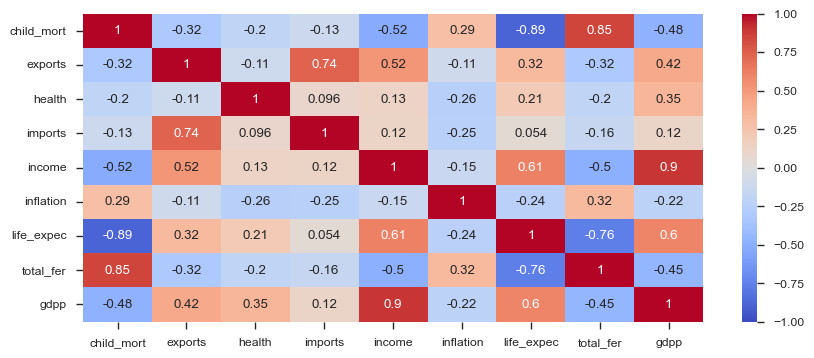

In [24]:
sns.set_context('paper')

fig,ax = plt.subplots(figsize=(10,4))
sns.heatmap(countries_scaled.corr(), cmap='coolwarm', annot=True, vmax=1, vmin=-1, ax=ax)

c:\Users\danie\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\danie\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\danie\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\danie\miniconda3\envs\infnet-nn\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


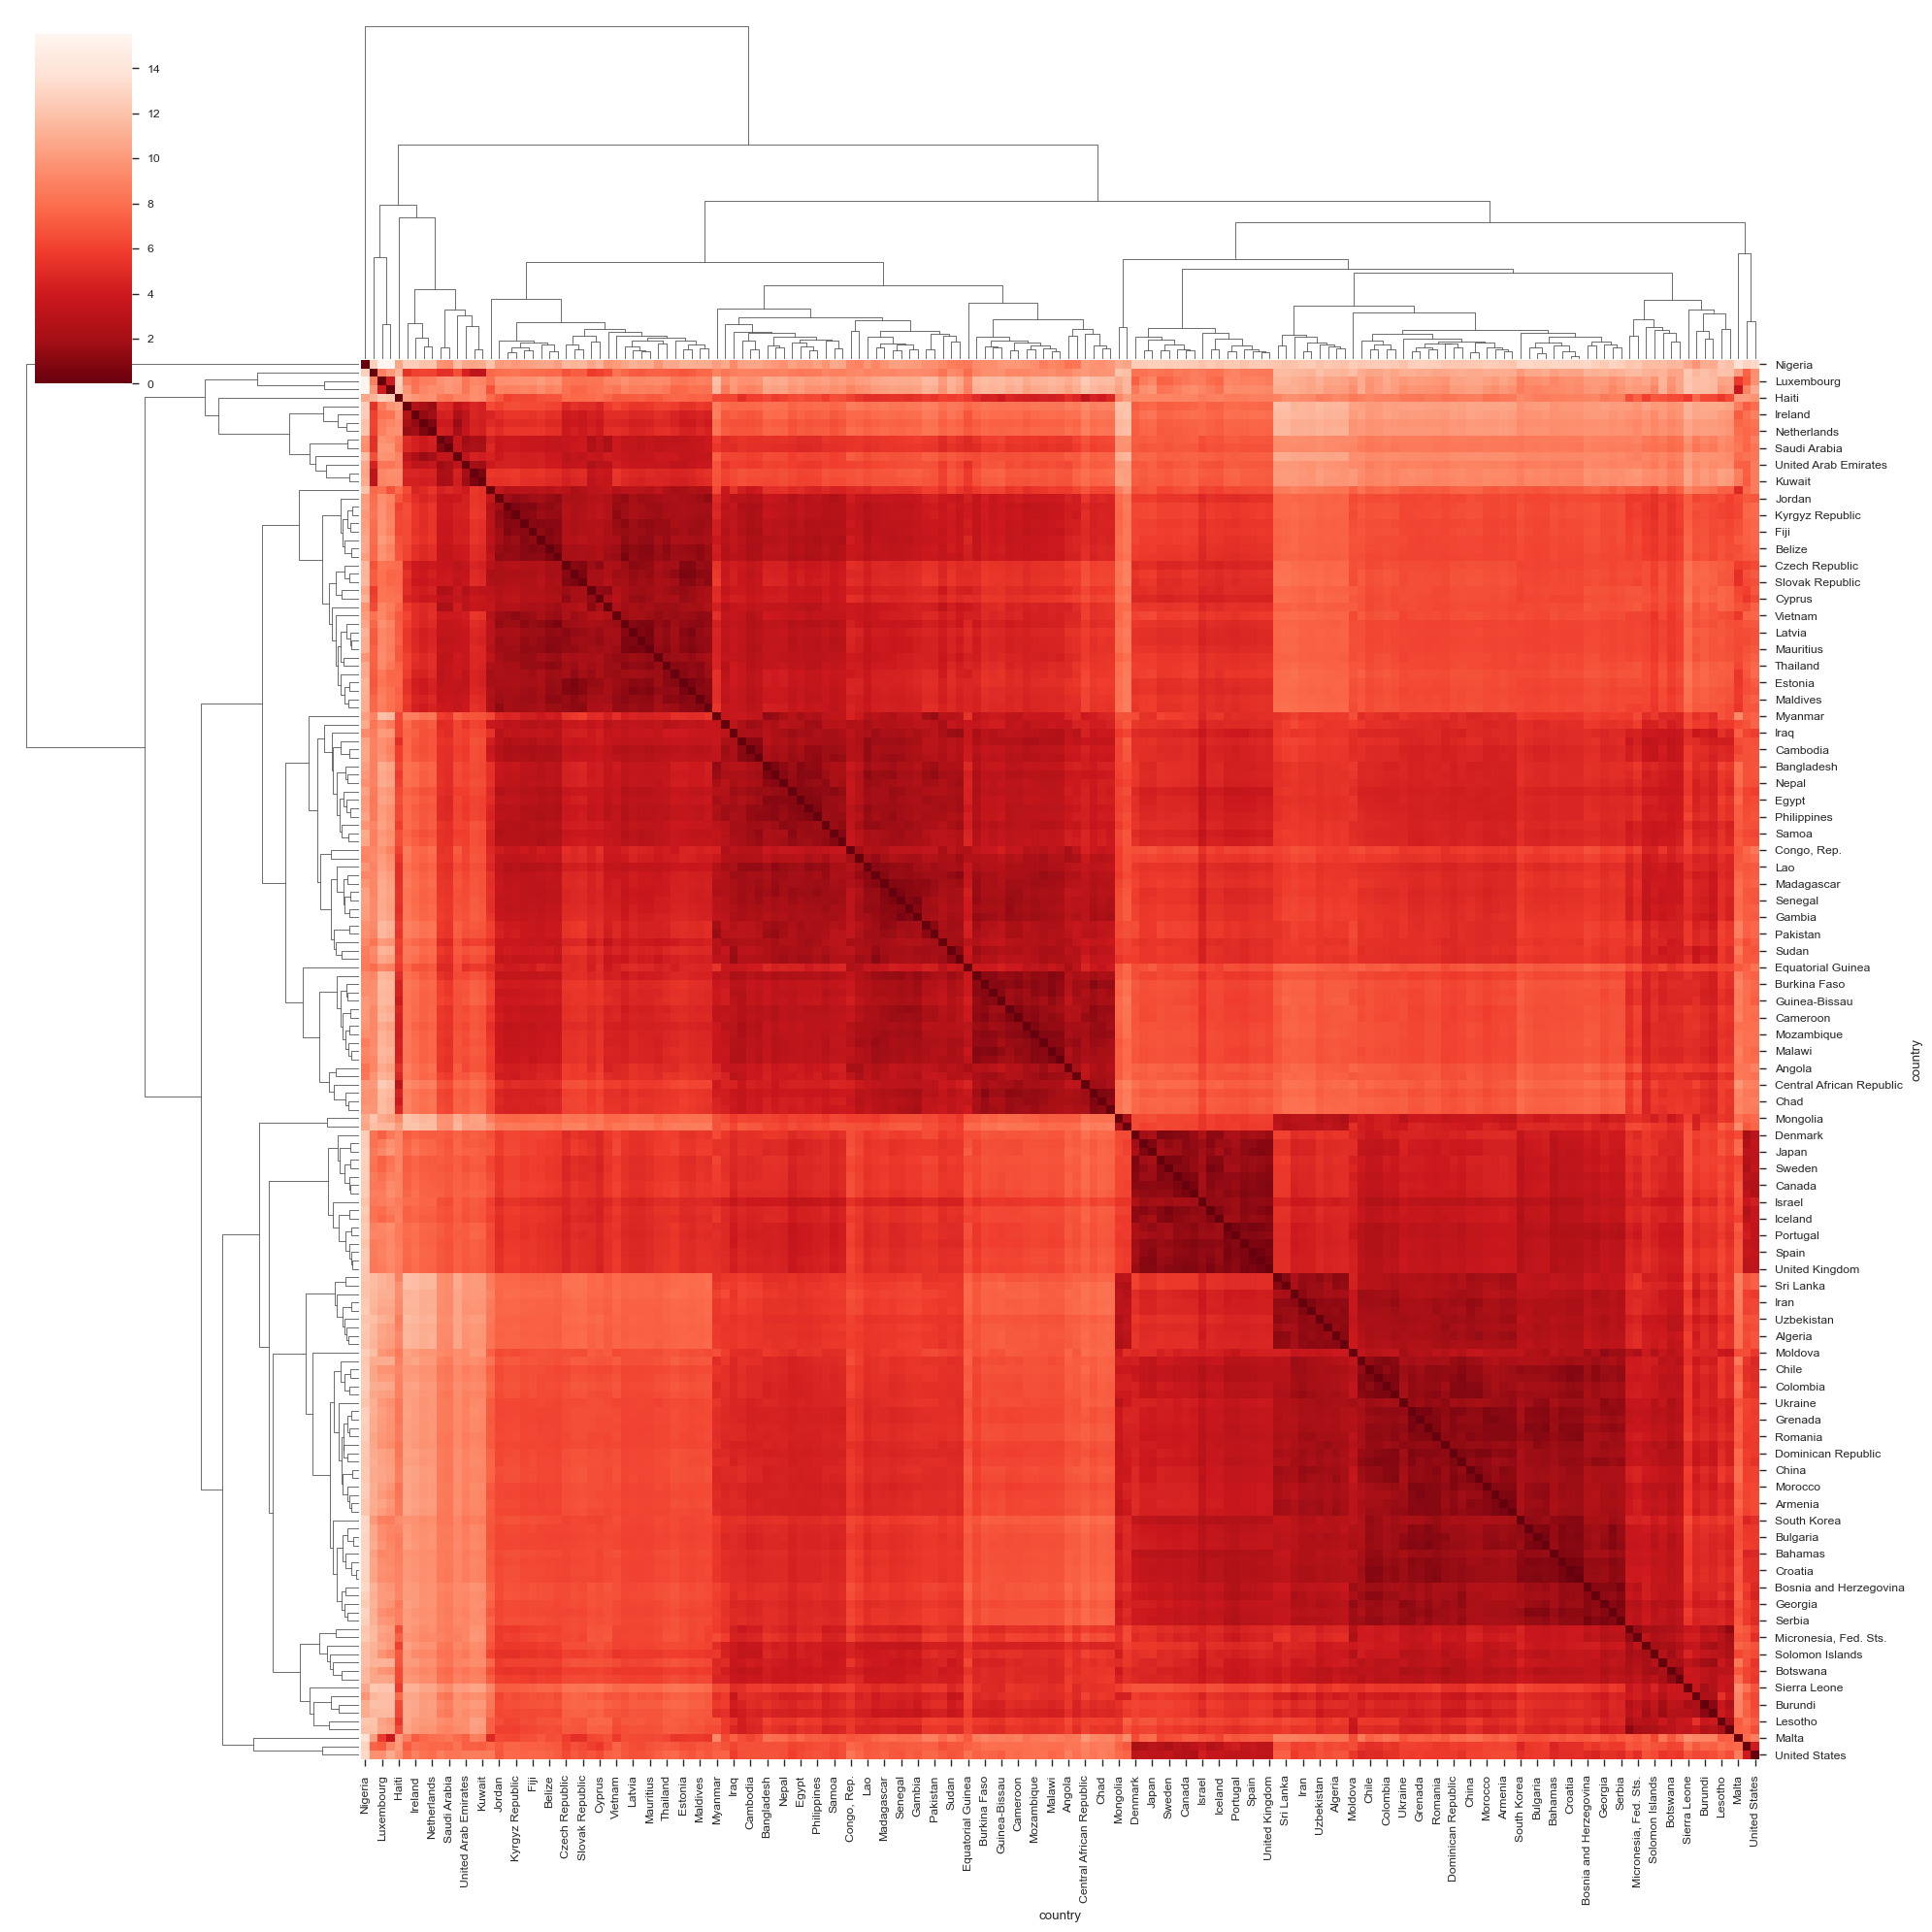

In [75]:
euclidean = DistanceMetric.get_metric('euclidean')
distances = euclidean.pairwise(countries_scaled)
distances = pd.DataFrame(distances, index=countries_scaled.index, columns=countries_scaled.index)

sns.clustermap(distances, cmap='Reds_r', vmin=0, figsize=(20,20))

# Analise dos Clusters
1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
- K-Médias
- DBScan

In [47]:
#KMeans
kmeans = KMeans() #Instanciando o kmeans

KElbowVisualizer(ax=<Axes: title={'center': 'Elbow Method - KMeans'}, xlabel='Número de clusters', ylabel='Distortion'>,
                 estimator=KMeans(n_clusters=11, random_state=42), k=(5, 12),
                 timings=False)

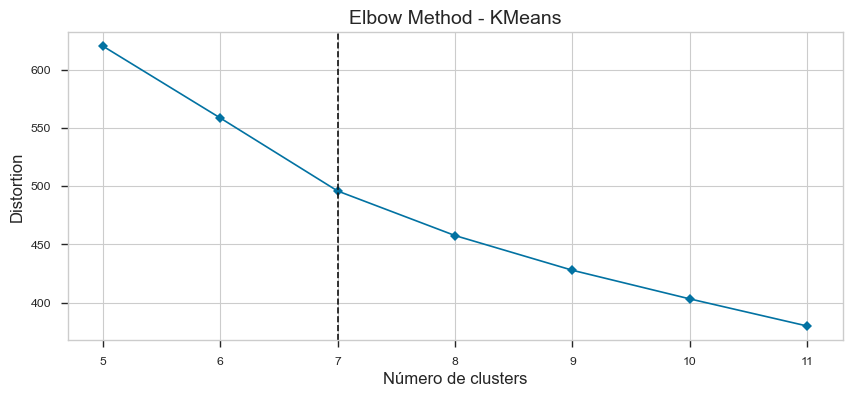

In [63]:
#Utilizando o Elbow Method para encontrar o número ideal de clusters
fig, ax = plt.subplots(figsize=(10,4))
visualizer = KElbowVisualizer(kmeans, k=(5,12), timings=False)

ax.set_title('Elbow Method - KMeans', fontsize=14)
ax.set_xlabel('Número de clusters', fontsize=12)
ax.set_ylabel('Distortion', fontsize=12)
visualizer.fit(countries_scaled)

- Pelo método de Elbow o número ideal de clusters é 4.

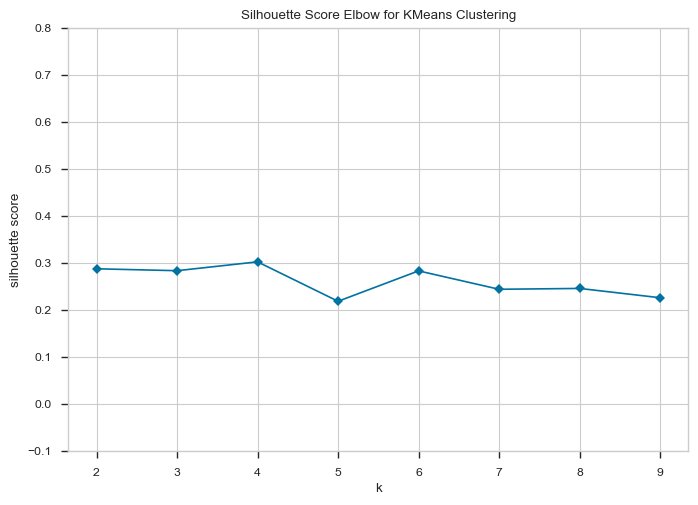

In [55]:
#Utilizando o Silhouette Method para encontrar o número ideal de clusters
fig,ax = plt.subplots()
model = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette', locate_elbow=False, timings=False, ax=ax)#Instanciando o ElbowVisualizer

model.fit(countries_scaled) #Treinando o modelo
ax.set_ylim([-.1, .8])
model.show();

Pelo gráfico acima podemos ver que o melhor número de clusters está entre 3 e 4, pois são onde o índice de silhoueta é maior sem perder estabilidade.

- Agora, façamos as analises utilizando o gráfico de Silhueta para a escolha do número ideal de Clusters:

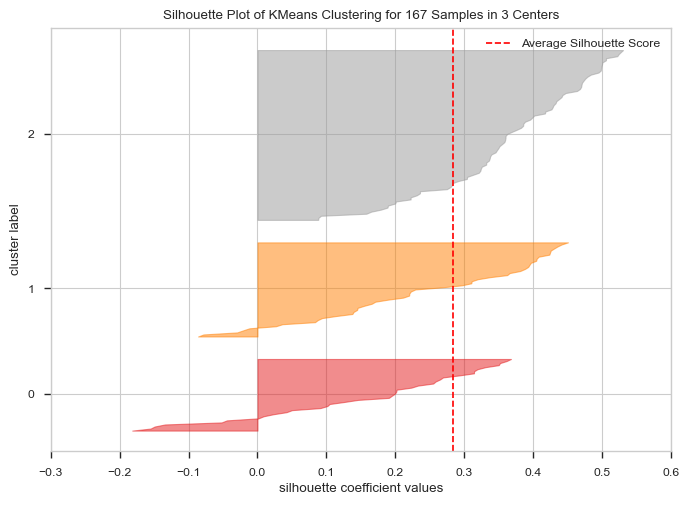

In [57]:
#Utilizando 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42) #Instanciando o kmeans com 3 clusters

model = SilhouetteVisualizer(kmeans)
model.fit(countries_scaled)
model.show();

In [66]:
#Nesse gráfico podemos ver que o cluster 0 possui uma silhueta média maior que os outros clusters, o que indica que ele é o melhor cluster
#para os dados
#Agora vamos ver quais países pertencem a esse cluster
kmeans.fit(countries_scaled) #Treinando o modelo
countries_scaled['cluster'] = kmeans.labels_ #Criando uma nova coluna no dataframe com os clusters
countries_scaled['cluster'].value_counts() #Contando quantos países pertencem a cada cluster

for k in range(3):
    print(f'Cluster {k}:')
    print(countries_scaled[countries_scaled['cluster'] == k].index)
    print('\n')



Cluster 0:
Index(['Belgium', 'Ireland', 'Netherlands', 'Slovenia', 'Switzerland'], dtype='object', name='country')


Cluster 1:
Index(['Albania', 'Armenia', 'Bahamas', 'Barbados', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Georgia',
       'Grenada', 'Jamaica', 'Lebanon', 'Macedonia, FYR', 'Moldova',
       'Montenegro', 'Morocco', 'Peru', 'Poland', 'Romania', 'Serbia',
       'South Korea', 'St. Vincent and the Grenadines', 'Suriname', 'Turkey',
       'Ukraine', 'Uruguay'],
      dtype='object', name='country')


Cluster 2:
Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Cote d'Ivoire',
       'Equatorial Guinea', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Malawi',
       'Mali', 'Mozambique', 'Niger', 'Tanzania', 'Zambia'],
      dtype='object', name='country')




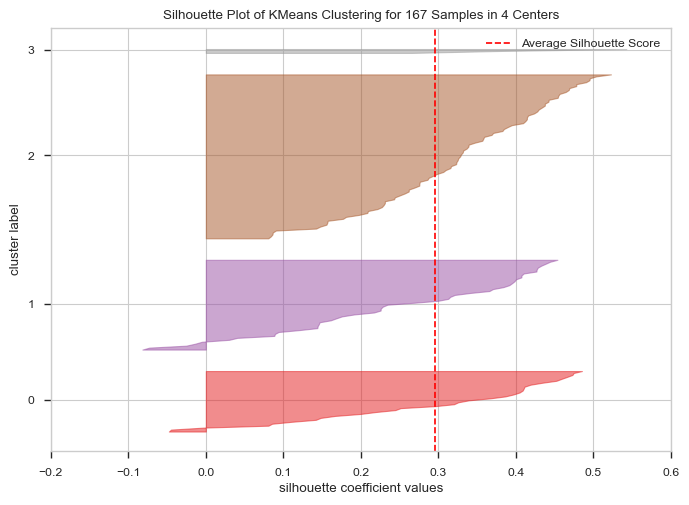

In [58]:
#Utilizando 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42) #Instanciando o kmeans com 3 clusters

model = SilhouetteVisualizer(kmeans)
model.fit(countries_scaled)
model.show();

In [76]:
#Nesse gráfico podemos ver que o cluster 0 possui uma silhueta média maior que os outros clusters, o que indica que ele é o melhor cluster para os dados

#Agora vamos ver quais países pertencem a esse cluster
kmeans.fit(countries_scaled) #Treinando o modelo
countries_scaled['cluster'] = kmeans.labels_ #Criando uma nova coluna no dataframe com os clusters
countries_scaled['cluster'].value_counts() #Contando quantos países pertencem a cada cluster

for k in range(4):
    print(f'Cluster {k}:')
    print(countries_scaled[countries_scaled['cluster'] == k].index)
    print('\n')


Cluster 0:
Index(['Bangladesh', 'Bolivia', 'Cambodia', 'Comoros', 'Congo, Rep.', 'Egypt',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'India', 'Iraq',
       'Kenya', 'Lao', 'Madagascar', 'Mauritania', 'Myanmar', 'Namibia',
       'Nepal', 'Pakistan', 'Philippines', 'Samoa', 'Senegal', 'Sudan',
       'Tajikistan', 'Tonga', 'Turkmenistan', 'Vanuatu', 'Yemen'],
      dtype='object', name='country')


Cluster 1:
Index(['Algeria', 'Argentina', 'Azerbaijan', 'Indonesia', 'Iran', 'Kazakhstan',
       'Mongolia', 'Russia', 'Sri Lanka', 'Uzbekistan', 'Venezuela'],
      dtype='object', name='country')


Cluster 2:
Index(['Belgium', 'Ireland', 'Netherlands', 'Slovenia', 'Switzerland'], dtype='object', name='country')


Cluster 3:
Index(['Antigua and Barbuda', 'Bahrain', 'Belarus', 'Belize', 'Bhutan',
       'Cape Verde', 'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Guyana',
       'Hungary', 'Jordan', 'Kyrgyz Republic', 'Latvia', 'Libya', 'Lithuania',
       'Malaysia', 'Mald


Sobre o processo de determinação do número de clusters:

- O método Elbow colocou como 4 o número ideal de clusters. Pelo método de Silhueta, o número 4 também aparecia como a melhor, mas o número 3 por esse método se mostrou promissor, por isso foi feita a análise utilizando o Silhouette Visualizer com 3 e com 4 clusters.

- Se observamors os resultados do Silhouette Visualizer juntamente com o gráfico de clustermap perceberemos que 4 clusters é de fato o número ideal, pois agrupa países mais semelhantes entre si do que utilizando 3 clusters.

- Por mais que o cluster adicional tenha magnitude pequena, a base de dados escolhida já sugere isso, pois na lista de países há uns poucos que possuem semelhança entre si que são bem mais desenvolvidos do que outros.

In [104]:
dbscan = DBSCAN() #Instanciando o DBSCAN
dbscan.fit(countries_scaled) #Treinando o modelo

DBSCAN()

In [105]:
clusters = dbscan.labels_ #Criando uma variável com os clusters
countries_scaled['cluster'] = clusters #Criando uma nova coluna no dataframe com os clusters
countries_scaled['cluster'].value_counts() #Contando quantos países pertencem a cada cluster

cluster
-1    167
Name: count, dtype: int64

- O DBSCAN é um algoritmo que não precisa de um número de clusters definido, ele define os clusters de acordo com a densidade dos dados
- Por isso ele não é um algoritmo muito bom para esse dataset, pois os dados não possuem uma densidade muito grande, pois todos foram classificados como Outliers.
- Logo, para esse problema, o DBSCAN não é uma boa opção.


# Medidas de Similaridade

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

- Normalização da base de dados.
- Calcular a correlação entre as variáveis, a plotagem de gráficos como o clustermap, ou uma matriz de dispersão facilitaria nessa visualização para melhor compreensão dos dados.
- Criação de um dendograma para visualizar as possíveis combinações entre as bases de dados.
- Plotado o dendograma, cortaria onde há 3 clusters.
- Atribuição dos labels (clusters) a cada série temporal.

2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

- Eu utilizaria o Kmeans devido a sua maior simplicidade e mais rápida implementação. O Kmeans também é o algoritmo que julgo mais fácil para visualizar os resultados permitindo correções nos parâmetros de iniciação do algoritmo caso eu ache que a clusterização feita não faz sentido.

3. Indique um caso de uso para essa solução projetada.

- Uma outra possibilidade seria a clusterização hierárquica, onde após a normalização da base de dados, podemos utilizar o dendograma para encontrar o número ideal de clusters.
Codigo para visualização do dendograma:

fig,ax = plt.subplots(figsize=(10,4))

dendrogram = sch.dendrogram(sch.linkage(countries_scaled, method='ward'), ax=ax)

ax.set_title('Dendrograma', fontsize=14)

ax.set_xlabel('Países', fontsize=12)

ax.set_ylabel('Distância', fontsize=12)

plt.xticks(rotation=90)

plt.show()

4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

- Uma outra estratégia para medir a similaridade entre séries temporais é utilizar o DTW(Dynamic Time Warping), que é uma técnica que mede a similaridade entre duas séries temporais que podem variar em velocidade e amplitude. Para utilizar essa técnica, é necessário seguir os seguintes passos:
1. Calcular a distância entre os pontos das duas séries temporais
2. Criar uma matriz de distâncias
3. Calcular a distância acumulada
4. Encontrar o menor caminho
5. Calcular a distância DTW
